In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression,Ridge,ElasticNet,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA

from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

Reading the data

In [340]:
df=pd.read_csv('train_data.csv')

C:\Users\Akshay G Rao\AppData\Local\Temp\ipykernel_25156\451060451.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('train_data.csv')


In [341]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2015-06-30,5735,568,1,1,0,0
1,2,2,2015-06-30,9863,877,1,1,0,0
2,3,2,2015-06-30,13261,1072,1,1,0,1
3,4,2,2015-06-30,13106,1488,1,1,0,0
4,5,2,2015-06-30,6635,645,1,1,0,0


In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982644 entries, 0 to 982643
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          982644 non-null  int64 
 1   DayOfWeek      982644 non-null  int64 
 2   Date           982644 non-null  object
 3   Sales          982644 non-null  int64 
 4   Customers      982644 non-null  int64 
 5   Open           982644 non-null  int64 
 6   Promo          982644 non-null  int64 
 7   StateHoliday   982644 non-null  object
 8   SchoolHoliday  982644 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 67.5+ MB


In [343]:
df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [344]:
df.shape

(982644, 9)

In [345]:
#df['Date'] = pd.to_datetime(df['Date'])

In [346]:
df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

Checking for null values if any

In [347]:
df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Sice there are no null values, the shape of data is given below

In [348]:
df.shape

(982644, 9)

Using encoding techniques converting object types to numeric values.

In [349]:
df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

StateHoliday feature is of object type

In [350]:
df['StateHoliday'].value_counts()

0    886058
0     65536
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

<AxesSubplot:xlabel='StateHoliday', ylabel='count'>

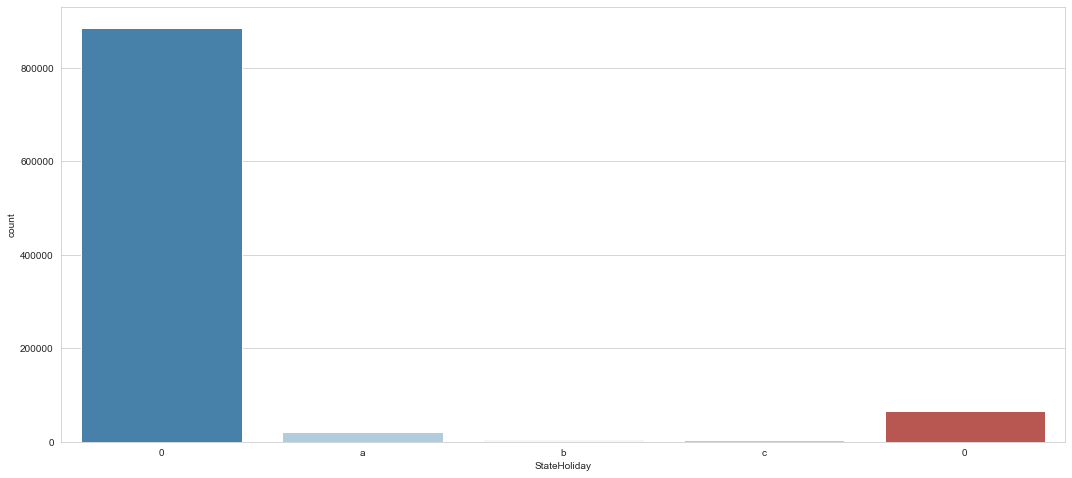

In [351]:
sns.set_style('whitegrid')
sns.countplot(x='StateHoliday',data=df,palette='RdBu_r')

In [352]:
df.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

Method 1

Using pd.get_dummies to convert object type to numeric value

In [353]:
df=pd.get_dummies(df, columns =['StateHoliday'],drop_first=True)

In [354]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,2,2015-06-30,5735,568,1,1,0,1,0,0,0
1,2,2,2015-06-30,9863,877,1,1,0,1,0,0,0
2,3,2,2015-06-30,13261,1072,1,1,1,1,0,0,0
3,4,2,2015-06-30,13106,1488,1,1,0,1,0,0,0
4,5,2,2015-06-30,6635,645,1,1,0,1,0,0,0


Method 2

Using onehot encoding technique

In [355]:
#ohe = OneHotEncoder()
#fState=pd.DataFrame(ohe.fit_transform(data[['StateHoliday']]).toarray())
#new_data=data.join(fState)

In [356]:
#new_data.head()

Now let's look at the value_counts of other columns

In [357]:
df.Open.value_counts()

1    814204
0    168440
Name: Open, dtype: int64

In [358]:
df.DayOfWeek.value_counts()

2    141204
1    140270
7    140270
6    140270
5    140270
4    140270
3    140090
Name: DayOfWeek, dtype: int64

In [359]:
#let's create columns of year,date,month from existing date column
df['year']=pd.to_datetime(df['Date'],format='%Y-%m-%d').dt.year 
df['month']=pd.to_datetime(df['Date'],format='%Y-%m-%d').dt.month 
df['day']=pd.to_datetime(df['Date'],format='%Y-%m-%d').dt.day

In [360]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,year,month,day
0,1,2,2015-06-30,5735,568,1,1,0,1,0,0,0,2015,6,30
1,2,2,2015-06-30,9863,877,1,1,0,1,0,0,0,2015,6,30
2,3,2,2015-06-30,13261,1072,1,1,1,1,0,0,0,2015,6,30
3,4,2,2015-06-30,13106,1488,1,1,0,1,0,0,0,2015,6,30
4,5,2,2015-06-30,6635,645,1,1,0,1,0,0,0,2015,6,30


In [361]:
df.year.value_counts()

2013    406974
2014    373855
2015    201815
Name: year, dtype: int64

<AxesSubplot:xlabel='year', ylabel='count'>

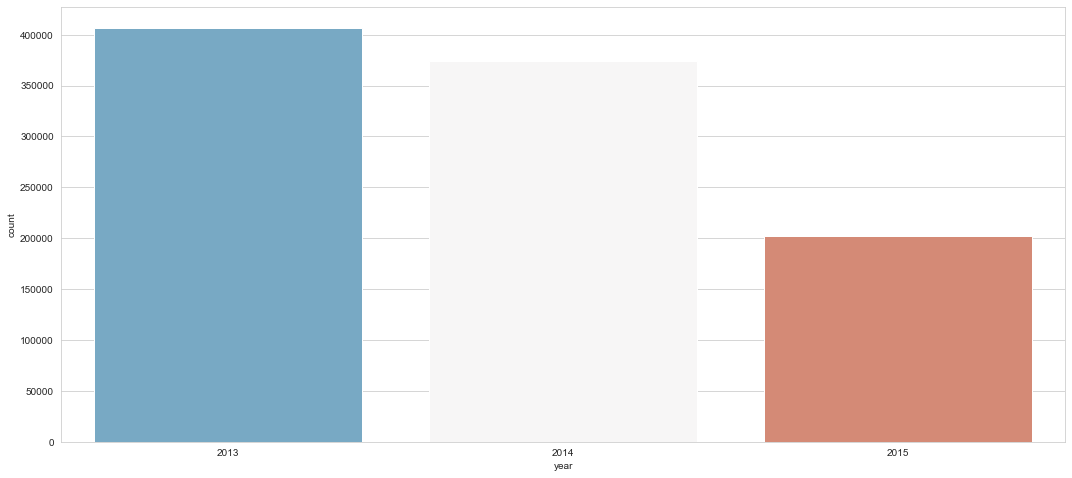

In [362]:
sns.set_style('whitegrid')
sns.countplot(x='year',data=df,palette='RdBu_r')

So the data contains values across 2013,2014 and 2015 

Let us make two dataframes df1 and df2. With df1 having 'STORE' as feature and df2 without 'STORE' as feature

In [363]:
df1= pd.get_dummies(df,columns=['DayOfWeek', 'Open', 'Promo','SchoolHoliday', 'year','Store','day','month'],drop_first=True)
df1.head()

,Date,Sales,Customers,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2015-06-30,5735,568,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2015-06-30,9863,877,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2015-06-30,13261,1072,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2015-06-30,13106,1488,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2015-06-30,6635,645,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [364]:
df1.columns

Index(['Date', 'Sales', 'Customers', 'StateHoliday_0', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4',
       ...
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object', length=1173)

In [365]:
df2= pd.get_dummies(df,columns=['DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'year','day','month'],drop_first=True)
df2.head()

,Store,Date,Sales,Customers,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,DayOfWeek_2,DayOfWeek_3,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1,2015-06-30,5735,568,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,2,2015-06-30,9863,877,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,3,2015-06-30,13261,1072,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,4,2015-06-30,13106,1488,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,5,2015-06-30,6635,645,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [366]:
df2.columns

Index(['Store', 'Date', 'Sales', 'Customers', 'StateHoliday_0',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'DayOfWeek_2',
       'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6',
       'DayOfWeek_7', 'Open_1', 'Promo_1', 'SchoolHoliday_1', 'year_2014',
       'year_2015', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7',
       'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13', 'day_14',
       'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'day_20', 'day_21',
       'day_22', 'day_23', 'day_24', 'day_25', 'day_26', 'day_27', 'day_28',
       'day_29', 'day_30', 'day_31', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12'],
      dtype='object')

In [367]:
df1.shape

(982644, 1173)

In [368]:
df2.shape

(982644, 60)

In [369]:
#let's split the train_data and use some of it's rows for testing and validation
train1 = df1.iloc[:900000].reset_index(drop=True)
test_val1 = df1.iloc[900000:941322].reset_index(drop=True)
test1 = df1.iloc[941322:].reset_index(drop=True)
train1.shape,test1.shape,test_val1.shape,


((900000, 1173), (41322, 1173), (41322, 1173))

In [370]:
train2 = df2.iloc[:900000].reset_index(drop=True)
test_val2 = df2.iloc[900000:941322].reset_index(drop=True)
test2 = df2.iloc[941322:].reset_index(drop=True)
train2.shape,test2.shape,test_val2.shape,


((900000, 60), (41322, 60), (41322, 60))

In [371]:
df.corr()['Sales']

Store             0.005338
DayOfWeek        -0.461249
Sales             1.000000
Customers         0.895700
Open              0.679248
Promo             0.451383
SchoolHoliday     0.076141
StateHoliday_0    0.153524
StateHoliday_a   -0.205744
StateHoliday_b   -0.119044
StateHoliday_c   -0.093835
year              0.019532
month             0.048435
day              -0.014450
Name: Sales, dtype: float64

Linear Regression 

1)Using df1 i.e dataframe with Store as Feature

In [372]:
Y_train = train1['Sales']
Y_val = test1['Sales']

In [373]:
Y_train.shape

(900000,)

In [374]:
X_train = train1.drop(['Sales','Date','Customers'],axis=1).values
X_val = test1.drop(['Sales','Date','Customers'],axis=1).values
lr_1 = LinearRegression()
lr_1.fit(X_train,Y_train)
Y_pred1 = lr_1.predict(X_val)
print('MSE',np.sqrt(mean_squared_error(Y_pred1,Y_val)))
print('MAE',mean_absolute_error(Y_pred1,Y_val))
print('model score for Train data',lr_1.score(X_train,Y_train))
print('model score for Test data',lr_1.score(X_val,Y_val))


MSE 1526.3750817308385
MAE 1107.6965596830773
model score for Train data 0.837619908015597
model score for Test data 0.8176200929944243


Linear Regression using df2 i.e dataframe without Store as Feature

In [375]:
X_train1 = train2.drop(['Sales','Date','Customers'],axis=1).values
X_val1 = test2.drop(['Sales','Date','Customers'],axis=1).values
lr_2 = LinearRegression()
lr_2.fit(X_train1,Y_train)
Y_pred2 = lr_2.predict(X_val1)
print('MSE',np.sqrt(mean_squared_error(Y_pred2,Y_val)))
print('MAE',mean_absolute_error(Y_pred2,Y_val))
print('model score for Train data',lr_2.score(X_train1,Y_train))
print('model score for Train data',lr_2.score(X_val1,Y_val))

MSE 2458.6622976458984
MAE 1722.404706316331
model score for Train data 0.5685294991963912
model score for Train data 0.5267918475136385


Model with STORE as feature performs better when compared to model without store as feature

Linear Regression - Separate model for each STORE

lets consider only few stores and get the resluts

In [376]:
Y_pred3=np.zeros(test1.shape[0])

train_store = train2.groupby(['Store'])
test_store = test2.groupby(['Store'])
#considering 20 stores only to see how model performs
for i in range(1,20):
    a = train_store.get_group(i)
    b = test_store.get_group(i)
    X_train = a.drop(['Sales','Date','Store','Customers'],axis=1).values
    X_val = b.drop(['Sales','Date','Store','Customers'],axis=1).values
    Y_train = a['Sales']
    lr = LinearRegression()
    lr.fit(X_train,Y_train)
    pred = lr.predict(X_val)
    i=0
    for j in b.index:
        Y_pred3[j]=pred[i]
        i+=1
print('MSE',np.sqrt(mean_squared_error(Y_pred3,Y_val)))
print('MAE',mean_absolute_error(Y_pred3,Y_val))

MSE 22974127466101.35
MAE 113018198391.32956


In [377]:
Y_pred3=np.zeros(test1.shape[0])

train_store = train2.groupby(['Store'])
test_store = test2.groupby(['Store'])
#considering all 1115 store
for i in range(1,1116):
    a = train_store.get_group(i)
    b = test_store.get_group(i)
    X_train = a.drop(['Sales','Date','Store','Customers'],axis=1).values
    X_val = b.drop(['Sales','Date','Store','Customers'],axis=1).values
    Y_train = a['Sales']
    #Y_val = b['Sales']
    lr = LinearRegression()
    lr.fit(X_train,Y_train)
    pred = lr.predict(X_val)
    i=0
    for j in b.index:
        Y_pred3[j]=pred[i]
        i+=1
print('MSE',np.sqrt(mean_squared_error(Y_pred3,Y_val)))
print('MAE',mean_absolute_error(Y_pred3,Y_val))

MSE 839718825196065.9
MAE 53212695043915.16


So looking at the results of all 3above models, Model with STORE as feature performs better when compared to model without store as feature

Average Ensemble Model of first and second model

Using the predicted values from model 1 and model 2 making the ensemble model.

In [378]:
#Y_pred1 is the predicted values of model 1
#Y_pred12 is the predicted values of model 2
final_pred=(Y_pred1+Y_pred2)/2
print('MSE',np.sqrt(mean_squared_error(final_pred,Y_val)))
print('MAE',mean_absolute_error(final_pred,Y_val))

MSE 1781.9069299723558
MAE 1301.3150481320895


Weighted Average Ensemble Model of first and second model

In [379]:
#Using the weights to predict
final_pred=Y_pred1*0.7+Y_pred2*0.3
print('MSE',np.sqrt(mean_squared_error(final_pred,Y_val)))
print('MAE',mean_absolute_error(final_pred,Y_val))

MSE 1610.6237772746208
MAE 1186.8018789552575


Using Ridge Regularization technique to building the model

In [380]:
Y_train = train1['Sales']
Y_val = test1['Sales']

In [53]:
X_train = train1.drop(['Sales','Date','Customers'],axis=1).values
X_val = test1.drop(['Sales','Date','Customers'],axis=1).values
rr =Ridge(alpha=10)
rr.fit(X_train,Y_train)
Y_pred1 = rr.predict(X_val)
print('MSE',np.sqrt(mean_squared_error(Y_pred1,Y_val)))
print('MAE',mean_absolute_error(Y_pred1,Y_val))
print('train model score',rr.score(X_train,Y_train))
print('test model score',rr.score(X_val,Y_val))

MSE 1525.3724070319695
MAE 1108.1763415191974
train model score 0.8373912687611514
test model score 0.817859624755245


In [55]:
#Using the linear CV model
from sklearn.linear_model import RidgeCV

#Ridge Cross validation
ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]).fit(X_train, Y_train)

#score
print("The train score for ridge model is {}".format(ridge_cv.score(X_train, Y_train)))
print("The test score for ridge model is {}".format(ridge_cv.score(X_val,Y_val)))

The train score for ridge model is 0.8376199042736427
The train score for ridge model is 0.8176257740391171


Train and test score for model using Ridge regression provided good results in terms of accuracy.

Using Lasso Regularization technique to building the model

In [56]:
X_train = train1.drop(['Sales','Date','Customers'],axis=1).values
X_val = test1.drop(['Sales','Date','Customers'],axis=1).values
rr =Lasso(alpha=10)
rr.fit(X_train,Y_train)
Y_pred1 = rr.predict(X_val)
print('MSE',np.sqrt(mean_squared_error(Y_pred1,Y_val)))
print('MAE',mean_absolute_error(Y_pred1,Y_val))
print('train model score',rr.score(X_train,Y_train))
print('test model score',rr.score(X_val,Y_val))

MSE 2454.1800962423254
MAE 1721.0789203291602
train model score 0.5699056723881699
test model score 0.5285156148784416


In [58]:
#Using the linear CV model
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, Y_train)


#score
print('train model score',lasso_cv.score(X_train, Y_train))
print('test model score',lasso_cv.score(X_val,Y_val))

C:\Users\Akshay G Rao\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7094254873.987305, tolerance: 1089290817.680386
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Akshay G Rao\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 288642884895.95557, tolerance: 1089290817.680386
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Akshay G Rao\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8832554395.623535, tolerance: 1075174062.7913384
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Akshay G Rao\anaconda3\lib\site-packages\sklearn\linear_model\

train model score 0.8376128249648618
test model score 0.8176489014042694


In [59]:
print(df1.shape)
print(df2.shape)

(982644, 1173)
(982644, 60)


Considering the case where the store is closed and we have around 814204 datapoints and splitting them in train and test and checking for accuracy

In [232]:
df=pd.read_csv('train_data.csv')
train=df[df.Open==1]
shape1=train.shape[0]
print(train.shape[0])
df['year']=pd.to_datetime(df['Date'],format='%Y-%m-%d').dt.year 
df['month']=pd.to_datetime(df['Date'],format='%Y-%m-%d').dt.month 
df['day']=pd.to_datetime(df['Date'],format='%Y-%m-%d').dt.day
df['year'] = df.year.replace({2013 : 0, 2014 : 1 , 2015 : 2 })
df['StateHoliday'] = df.StateHoliday.replace({'0' : 0, 'a' : 1 , 'b' : 2 ,'c' : 3})
#with Store Id as features
df1= pd.get_dummies(df,columns=['DayOfWeek', 'Promo','StateHoliday', 'SchoolHoliday', 'year','Store','day','month'],drop_first=True)
#without Store Id as features
df2= pd.get_dummies(df,columns=['DayOfWeek', 'Promo','StateHoliday', 'SchoolHoliday', 'year','day','month'],drop_first=True)

print(df1.shape)
print(df2.shape)


train1 = df1.iloc[:800000].reset_index(drop=True)
test_val1 = df1.iloc[800000:807102].reset_index(drop=True)
test1 = df1.iloc[807102:].reset_index(drop=True)
print(train1.shape,test_val1.shape,test1.shape)

train2 = df2.iloc[:800000].reset_index(drop=True)
test_val2 = df2.iloc[800000:807102].reset_index(drop=True)
test2 = df2.iloc[807102:].reset_index(drop=True)
print(train2.shape,test_val2.shape,test2.shape)

C:\Users\Akshay G Rao\AppData\Local\Temp\ipykernel_25156\3609912315.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('train_data.csv')


814204
(982644, 1172)
(982644, 59)
(800000, 1172) (7102, 1172) (175542, 1172)
(800000, 59) (7102, 59) (175542, 59)


In [233]:
Y_train = train1['Sales']
Y_val = test_val1['Sales']

In [78]:
X_train = train1.drop(['Sales','Date','Open','Customers'],axis=1).values
X_val = test_val1.drop(['Sales','Date','Open','Customers'],axis=1).values

lr = LinearRegression()
lr.fit(X_train,Y_train)
pred1 = lr.predict(X_val)

ind=test_val1[test_val1.Open==0].index
for i in ind:
    pred1[i] = 0
    
print('MSE',np.sqrt(mean_squared_error(pred1,Y_val)))
print('MAE',mean_absolute_error(pred1,Y_val))
print('model score for Train data',lr.score(X_train,Y_train))
print('model score for Train data',lr.score(X_val,Y_val))


MSE 1031.0906131403583
MAE 673.4706576815855
model score for Train data 0.8238133614857793
model score for Train data 0.8122277385616546


In [90]:
Y_train1 = train2['Sales']
Y_val1 = test_val2['Sales']

In [91]:
X_train1 = train2.drop(['Sales','Date','Open','Customers'],axis=1).values
X_val1 = test_val2.drop(['Sales','Date','Open','Customers'],axis=1).values

lr = LinearRegression()
lr.fit(X_train1,Y_train1)
pred2 = lr.predict(X_val1)

ind=test_val2[test_val2.Open==0].index
for i in ind:
    pred2[i] = 0
    
print('MSE',np.sqrt(mean_squared_error(pred2,Y_val1)))
print('MAE',mean_absolute_error(pred2,Y_val1))
print('model score for Train data',lr.score(X_train1,Y_train1))
print('model score for Train data',lr.score(X_val1,Y_val1))

# MSE 2520.0716734481657
# MAE 1731.704737951524

MSE 2236.716187331641
MAE 1476.1940371301685
model score for Train data 0.5428533187779054
model score for Train data 0.44357216445148073


In [92]:
Y_train = train1['Sales']
Y_val = test_val1['Sales']

In [93]:
pred3=np.zeros(test_val1.shape[0])

train_store = train2.groupby(['Store'])
test_store = test_val2.groupby(['Store'])

for i in range(1,1116):
    a = train_store.get_group(i)
    b = test_store.get_group(i)
    X_train = a.drop(['Sales','Date','Store','Customers','Open'],axis=1).values
    X_val = b.drop(['Sales','Date','Store','Customers','Open'],axis=1).values
    Y_train = a['Sales']
    lr = LinearRegression()
    lr.fit(X_train,Y_train)
    pred = lr.predict(X_val)
    i=0
    ind=b[b['Open']==0].index
    for j in b.index:
        if(j in ind):
            pred3[j]=0
        else:
            pred3[j]=pred[i]
        i+=1
print('MSE',np.sqrt(mean_squared_error(pred3,Y_val)))
print('MAE',mean_absolute_error(pred3,Y_val))


MSE 692.2215016723477
MAE 444.0802329361221


In [95]:
train_store = train2.groupby(['Store'])
test_store = test_val2.groupby(['Store'])

for i in range(1,1116):
    a = train_store.get_group(i)
    b = test_store.get_group(i)
    X_train = a.drop(['Sales','Date','Store','Customers','Open'],axis=1).values
    X_val = b.drop(['Sales','Date','Store','Customers','Open'],axis=1).values
    Y_train = a['Sales']
    lr = Ridge(alpha=20)
    lr.fit(X_train,Y_train)
    pred = lr.predict(X_val)
    i=0
    ind=b[b['Open']==0].index
    for j in b.index:
        if(j in ind):
            pred3[j]=0
        else:
            pred3[j]=pred[i]
        i+=1
print('MSE',np.sqrt(mean_squared_error(pred3,Y_val1)))
print('MAE',mean_absolute_error(pred3,Y_val1))


MSE 659.7113871744561
MAE 424.11058377500854


In [96]:
Y_train = train1['Sales']
Y_val = test_val1['Sales']

Using  Random Forest technique

In [99]:
#With Store as Feature
X_train = train1.drop(['Sales','Date','Open','Customers'],axis=1).values
X_val = test_val1.drop(['Sales','Date','Open','Customers'],axis=1).values

clf = RandomForestRegressor(n_estimators=500,max_features='sqrt',max_depth=6,random_state=0,n_jobs=7)
clf.fit(X_train,Y_train)
pred1 = clf.predict(X_val)

ind=test_val1[test_val1.Open==0].index
for i in ind:
    pred1[i] = 0
    
print('MSE',np.sqrt(mean_squared_error(pred1,Y_val)))
print('MAE',mean_absolute_error(pred1,Y_val))

MSE 2101.9071537848567
MAE 1400.0523010120671


In [100]:
#Without Store as Feature
X_train = train2.drop(['Sales','Date','Open','Customers'],axis=1).values
X_val = test_val2.drop(['Sales','Date','Open','Customers'],axis=1).values
clf = RandomForestRegressor(n_estimators=500,max_features='sqrt',max_depth=6,random_state=0,n_jobs=7)
clf.fit(X_train,Y_train1)
pred1 = clf.predict(X_val)

ind=test_val2[test_val2.Open==0].index
for i in ind:
    pred1[i] = 0
    
print('MSE',np.sqrt(mean_squared_error(pred1,Y_val1)))
print('MAE',mean_absolute_error(pred1,Y_val1))

MSE 2192.5254068103723
MAE 1449.166751861851


In [101]:
#Separate model for each Store
pred3=np.zeros(test_val1.shape[0])

train_store = train2.groupby(['Store'])
test_store = test_val2.groupby(['Store'])

for i in range(1,1116):
    a = train_store.get_group(i)
    b = test_store.get_group(i)
    X_train = a.drop(['Sales','Date','Store','Customers','Open'],axis=1).values
    X_val = b.drop(['Sales','Date','Store','Customers','Open'],axis=1).values
    Y_train = a['Sales']
    clf = RandomForestRegressor(n_estimators=500,max_features='sqrt',max_depth=6,random_state=0,n_jobs=7)
    clf.fit(X_train,Y_train)
    pred = clf.predict(X_val)
    i=0
    ind=b[b['Open']==0].index
    for j in b.index:
        if(j in ind):
            pred3[j]=0
        else:
            pred3[j]=pred[i]
        i+=1
print('MSE',np.sqrt(mean_squared_error(pred3,Y_val1)))
print('MAE',mean_absolute_error(pred3,Y_val1))

MSE 741.8997647722841
MAE 493.15407225489264


Using PCA techinque

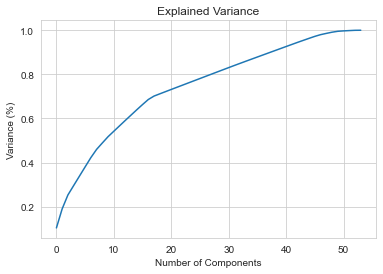

In [102]:
PCAX_train = train1.drop(['Sales','Date','Open','Customers'],axis=1).values
X_val = test_val1.drop(['Sales','Date','Open','Customers'],axis=1).values
pca = PCA().fit(X_train)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()
# Cumulative Variance explains
# var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
# print(var1.shape)
# print(var1)

In [103]:
X_train = train1.drop(['Sales','Date','Open','Customers'],axis=1).values
X_val = test_val1.drop(['Sales','Date','Open','Customers'],axis=1).values
Y_train = train1['Sales']
Y_val = test_val1['Sales']

pca = PCA(n_components=50)  
X_train = pca.fit_transform(X_train)  
X_val= pca.transform(X_val) 

clf = RandomForestRegressor(n_estimators=500,max_features='sqrt',max_depth=6,random_state=0,n_jobs=7)
clf.fit(X_train,Y_train)
pred1 = clf.predict(X_val)

ind=test_val1[test_val1.Open==0].index
for i in ind:
    pred1[i] = 0
    
print('MSE',np.sqrt(mean_squared_error(pred1,Y_val)))
print('MAE',mean_absolute_error(pred1,Y_val))

MSE 2231.5619065861224
MAE 1492.497268271634


Using XGBRegressor

In [258]:
#With Store as Feature
X_train = train1.drop(['Sales','Date','Open','Customers'],axis=1).values
X_val = test_val1.drop(['Sales','Date','Open','Customers'],axis=1).values

clf = XGBRegressor(n_estimators=50, learning_rate=0.5,max_depth=6,random_state=0,n_jobs=7)
clf.fit(X_train,Y_train)
pred1 = clf.predict(X_val)

ind=test_val1[test_val1.Open==0].index
for i in ind:
    pred1[i] = 0
    
print('MSE',np.sqrt(mean_squared_error(pred1,Y_val)))
print('MAE',mean_absolute_error(pred1,Y_val))

MSE 1373.9887061901852
MAE 1012.3377351903204


In [263]:
#Without Store as Feature
X_train = train2.drop(['Sales','Date','Open','Customers'],axis=1).values
X_val = test_val2.drop(['Sales','Date','Open','Customers'],axis=1).values
clf = XGBRegressor(n_estimators=50, learning_rate=0.5,max_depth=6,random_state=0,n_jobs=7)
clf.fit(X_train,Y_train)
pred1 = clf.predict(X_val)

ind=test_val2[test_val2.Open==0].index
for i in ind:
    pred1[i] = 0
    
print('MSE',np.sqrt(mean_squared_error(pred1,Y_val1)))
print('MAE',mean_absolute_error(pred1,Y_val1))

MSE 1326.7413967974387
MAE 901.5859164208703


In [260]:
#Separate model for each Store
pred3=np.zeros(test_val2.shape[0])

train_store = train2.groupby(['Store'])
test_store = test_val2.groupby(['Store'])

for i in range(1,1116):
    a = train_store.get_group(i)
    b = test_store.get_group(i)
    X_train = a.drop(['Sales','Date','Store','Customers','Open'],axis=1).values
    X_val = b.drop(['Sales','Date','Store','Customers','Open'],axis=1).values
    Y_train = a['Sales']
    clf = XGBRegressor(n_estimators=50, learning_rate=0.5,max_depth=6,random_state=0,n_jobs=7)
    clf.fit(X_train,Y_train)
    pred = clf.predict(X_val)
    i=0
    ind=b[b['Open']==0].index
    for j in b.index:
        if(j in ind):
            pred3[j]=0
        else:
            pred3[j]=pred[i]
        i+=1
print('MSE',np.sqrt(mean_squared_error(pred3,Y_val1)))
print('MAE',mean_absolute_error(pred3,Y_val1))

MSE 653.8525052285659
MAE 404.0667704671109


In [261]:
X_train.shape,Y_train.shape

((747, 54), (747,))

Using XGBRegressor the performance of the model slightly improved than previos model

In [265]:
X_train = train1.drop(['Sales','Date','Customers'],axis=1).values
X_val = test_val1.drop(['Sales','Date','Customers'],axis=1).values
Y_train = train1['Sales']
Y_val = test_val1['Sales']
pca = PCA(n_components=50) 
X_train = pca.fit_transform(X_train)  
X_val= pca.transform(X_val) 

clf = XGBRegressor(n_estimators=50, learning_rate=0.1,max_depth=6,random_state=0,n_jobs=7,objective='reg:squarederror', 
                   booster='gbtree')
clf.fit(X_train,Y_train)
pred1 = clf.predict(X_val)

ind=test_val1[test_val1.Open==0].index
for i in ind:
    pred1[i] = 0
    
print('MSE',np.sqrt(mean_squared_error(pred1,Y_val)))
print('MAE',mean_absolute_error(pred1,Y_val))

MSE 2172.9797269606674
MAE 1437.9582093952408


Time series model

In [286]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
Train = pd.read_csv("train_data.csv", parse_dates=['Date'], index_col='Date',date_parser=dateparse)
Test_val=Train[900000:]
Train=Train[['Store','Sales','Open','DayOfWeek']]
Test_val=Test_val[['Store','Sales','Open','DayOfWeek']]
print ('\n Parsed Data:')
Train.sort_values(['Date'],axis=0,inplace=True)
Test_val.sort_values(['Date'],axis=0,inplace=True)
print (Train.head())

C:\Users\Akshay G Rao\AppData\Local\Temp\ipykernel_25156\3131759306.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  Train = pd.read_csv("train_data.csv", parse_dates=['Date'], index_col='Date',date_parser=dateparse)
C:\Users\Akshay G Rao\AppData\Local\Temp\ipykernel_25156\3131759306.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')



 Parsed Data:
            Store  Sales  Open  DayOfWeek
Date                                     
2013-01-01   1115      0     0          2
2013-01-01    379      0     0          2
2013-01-01    378      0     0          2
2013-01-01    377      0     0          2
2013-01-01    376      0     0          2


C:\Users\Akshay G Rao\AppData\Local\Temp\ipykernel_25156\3131759306.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train.sort_values(['Date'],axis=0,inplace=True)


In [287]:
print(Train.shape)
print(Test_val.shape)

(982644, 4)
(82644, 4)


In [288]:
Train.columns

Index(['Store', 'Sales', 'Open', 'DayOfWeek'], dtype='object')

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

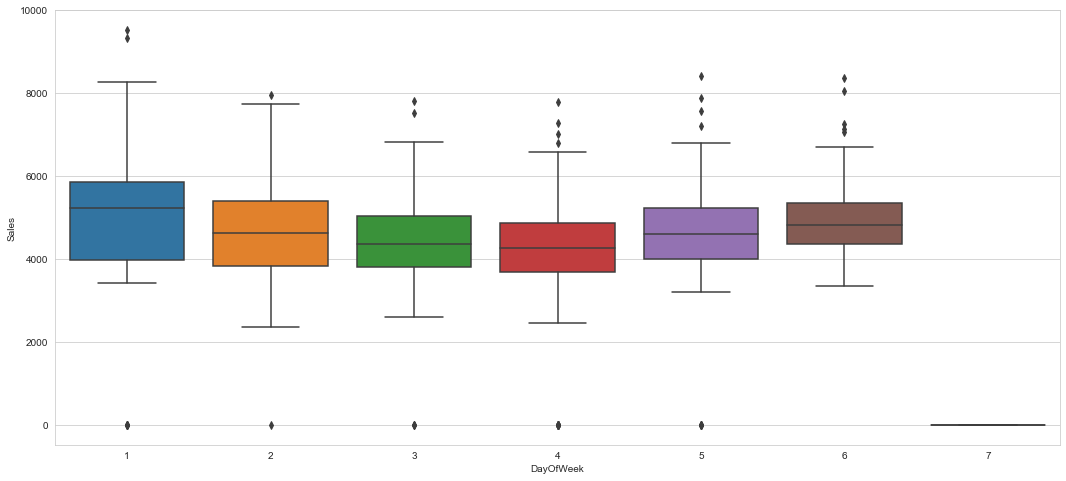

In [289]:
store1=Train[Train.Store==1]
test_store1=Test_val[Test_val.Store==1]
sns.boxplot(x="DayOfWeek", y="Sales", data=store1)

Since Stores are closed on sunday so there will be no sales. Monday has more sales, Thurdays has little smaller. There's a few outliers on all days(except Sunday) but outliers are less on Weekdays i.e from Monday to Wednesday

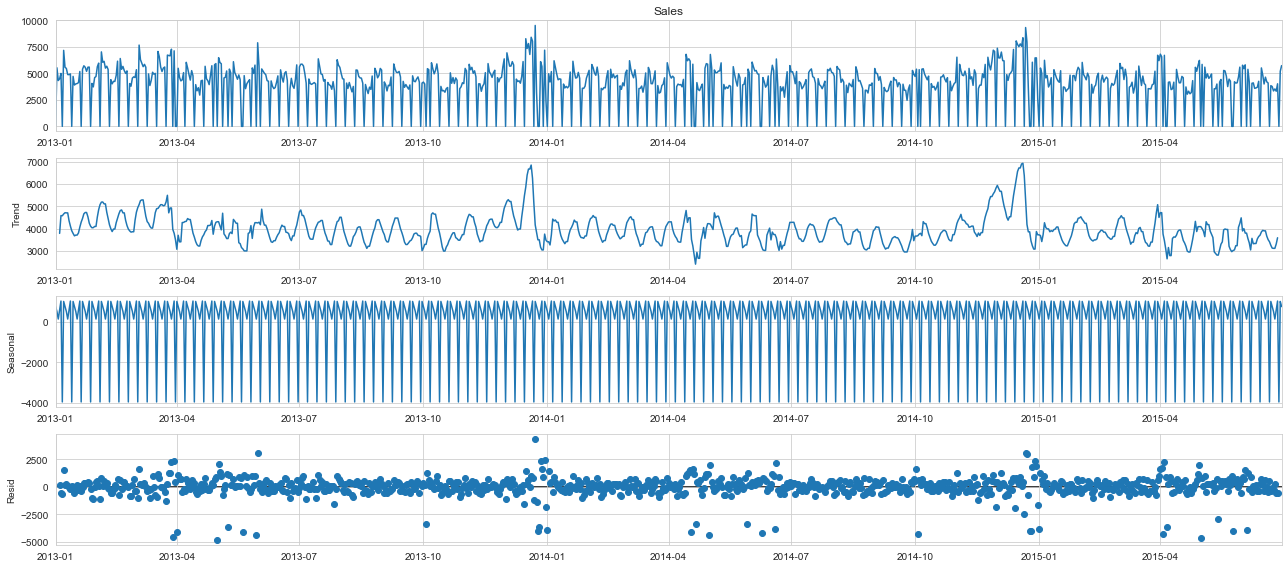

In [290]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(store1['Sales'], model='additive')
fig = decomposition.plot()
plt.show()

Testing stationarity

In [291]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Rolling mean,Rolling std after decomposition

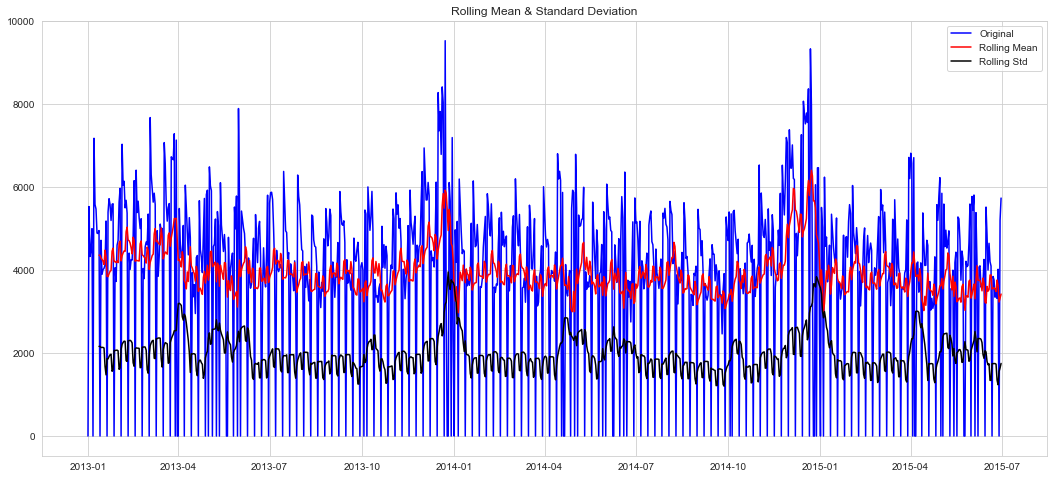

Results of Dickey-Fuller Test:
Test Statistic                  -4.236942
p-value                          0.000570
#Lags Used                      21.000000
Number of Observations Used    889.000000
Critical Value (1%)             -3.437727
Critical Value (5%)             -2.864797
Critical Value (10%)            -2.568504
dtype: float64


In [292]:
test_stationarity(store1['Sales'])

Rolling mean,Rolling std after decomposition

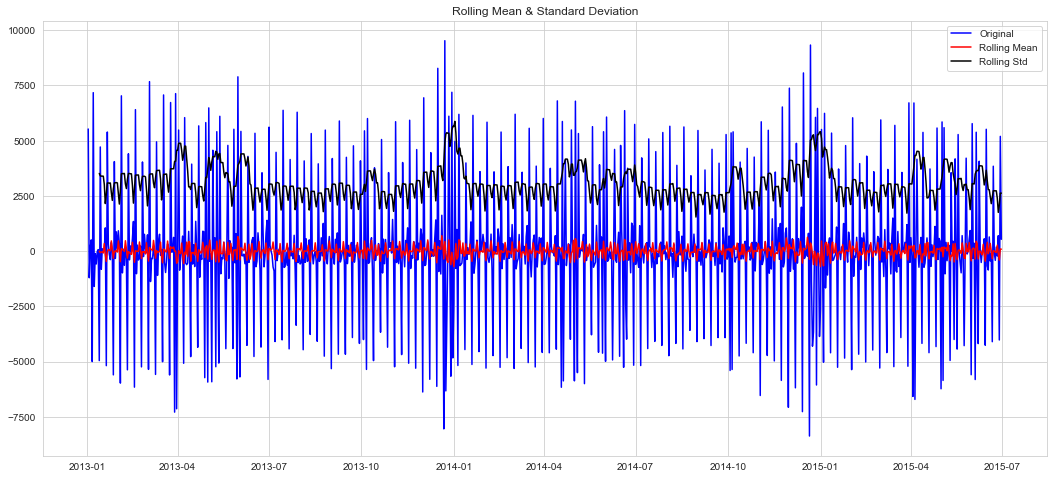

Results of Dickey-Fuller Test:
Test Statistic                -1.134395e+01
p-value                        1.038132e-20
#Lags Used                     2.000000e+01
Number of Observations Used    8.890000e+02
Critical Value (1%)           -3.437727e+00
Critical Value (5%)           -2.864797e+00
Critical Value (10%)          -2.568504e+00
dtype: float64


In [293]:
first_diff = store1['Sales'] - store1['Sales'].shift(1)
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff)

After differencing, the p-value is extremely small. Thus this series is very likely to be stationary.

In [320]:
print(Y_pred.shape)
print(test_store1.Sales.shape)

()
(74,)


In [312]:
Y_pred

3665.2902655059393

In [333]:
#AR model
import statsmodels
ar_mod = statsmodels.tsa.arima.model.ARIMA(store1.Sales,order= (9,1,0),freq='D')
res=ar_mod.fit()
Y_pred = res.forecast(steps=31)[0]
Y_pred

C:\Users\Akshay G Rao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


3665.2902655059393

In [323]:
#MA model
ma_mod = statsmodels.tsa.arima.model.ARIMA(store1.Sales, order=(0,1,1),freq='D')
res=ma_mod.fit()
Y_pred = res.forecast(steps=31)[0]
Y_pred

C:\Users\Akshay G Rao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


3943.3281928466213

In [335]:
#ARIMA model
arima_mod = statsmodels.tsa.arima.model.ARIMA(store1.Sales, order=(1,0,1),freq='D')
res=arima_mod.fit()
Y_pred = res.forecast(steps=31)[0]
store1['pred']=Y_pred
Y_pred

C:\Users\Akshay G Rao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Akshay G Rao\AppData\Local\Temp\ipykernel_25156\3271995549.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store1['pred']=Y_pred


3694.212112952963

LSTM model

In [336]:
train_store1 = store1.iloc[:, 1:2].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_store1 = sc.fit_transform(train_store1)

X_train = []
Y_train = []
for i in range(30, 911):
    X_train.append(train_store1[i-30:i, 0])
    Y_train.append(train_store1[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [337]:
regressor = Sequential()
regressor.add(LSTM(units = 30, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(LSTM(units = 70, return_sequences = True))
regressor.add(LSTM(units = 50))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=["accuracy"])
regressor.fit(X_train, Y_train, epochs = 100, batch_size = 64, shuffle=False)

Epoch 1/100
14/14 [==============================] - 11s 104ms/step - loss: 0.0805 - accuracy: 0.1328
Epoch 2/100
14/14 [==============================] - 1s 96ms/step - loss: 0.0473 - accuracy: 0.1623
Epoch 3/100
14/14 [==============================] - 1s 95ms/step - loss: 0.0455 - accuracy: 0.1691
Epoch 4/100
14/14 [==============================] - 1s 95ms/step - loss: 0.0449 - accuracy: 0.1725
Epoch 5/100
14/14 [==============================] - 1s 95ms/step - loss: 0.0450 - accuracy: 0.1725
Epoch 6/100
14/14 [==============================] - 1s 94ms/step - loss: 0.0450 - accuracy: 0.1725
Epoch 7/100
14/14 [==============================] - 1s 94ms/step - loss: 0.0450 - accuracy: 0.1725
Epoch 8/100
14/14 [==============================] - 1s 97ms/step - loss: 0.0450 - accuracy: 0.1725
Epoch 9/100
14/14 [==============================] - 1s 94ms/step - loss: 0.0450 - accuracy: 0.1725
Epoch 10/100
14/14 [==============================] - 1s 96ms/step - loss: 0.0450 - accuracy: 0.17

14/14 [==============================] - 1s 93ms/step - loss: 0.0441 - accuracy: 0.1691
Epoch 83/100
14/14 [==============================] - 1s 93ms/step - loss: 0.0442 - accuracy: 0.1703
Epoch 84/100
14/14 [==============================] - 1s 94ms/step - loss: 0.0442 - accuracy: 0.1669
Epoch 85/100
14/14 [==============================] - 1s 92ms/step - loss: 0.0447 - accuracy: 0.1691
Epoch 86/100
14/14 [==============================] - 1s 93ms/step - loss: 0.0439 - accuracy: 0.1691
Epoch 87/100
14/14 [==============================] - 1s 92ms/step - loss: 0.0439 - accuracy: 0.1680
Epoch 88/100
14/14 [==============================] - 1s 93ms/step - loss: 0.0445 - accuracy: 0.1714
Epoch 89/100
14/14 [==============================] - 1s 92ms/step - loss: 0.0440 - accuracy: 0.1680
Epoch 90/100
14/14 [==============================] - 1s 94ms/step - loss: 0.0438 - accuracy: 0.1680
Epoch 91/100
14/14 [==============================] - 1s 93ms/step - loss: 0.0436 - accuracy: 0.1680
Epo

In [339]:
total_data = pd.concat((store1['Sales'], test_store1['Sales']), axis = 0)
inputs = total_data[len(total_data) - len(test_store1) - 30:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(30, 61):
    X_test.append(inputs[i-30:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred = regressor.predict(X_test)
pred= sc.inverse_transform(pred)
pred

1/1 [==============================] - 0s 45ms/step


array([[4464.673 ],
       [4118.709 ],
       [3724.238 ],
       [3592.0127],
       [3475.024 ],
       [3380.1553],
       [3410.2395],
       [3417.4202],
       [3415.8962],
       [3448.0352],
       [3491.915 ],
       [3527.2983],
       [3554.46  ],
       [3560.689 ],
       [3790.337 ],
       [3699.8672],
       [3639.253 ],
       [3663.4546],
       [3677.6147],
       [3754.814 ],
       [3858.795 ],
       [4186.3066],
       [4243.299 ],
       [4242.1655],
       [4189.6367],
       [4047.285 ],
       [3875.2905],
       [3662.4985],
       [3805.0847],
       [3556.6973],
       [3495.0112]], dtype=float32)

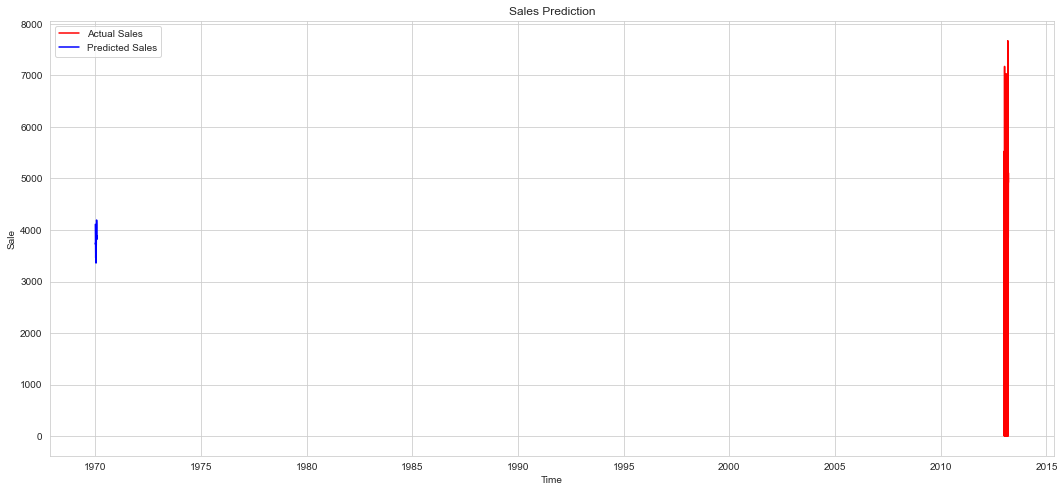

In [159]:
# Visualising the results
plt.plot(test_store1.Sales, color = 'red', label = 'Actual Sales')
plt.plot(pred, color = 'blue', label = 'Predicted Sales')
plt.title('Sales Prediction')
plt.xlabel('Time')
plt.ylabel('Sale')
plt.legend()
plt.show()

In [201]:
#Model1
from sklearn.preprocessing import StandardScaler

X_train = train2.drop(['Sales','Date','Customers'],axis=1).values
X_val = test_val2.drop(['Sales','Date','Customers'],axis=1).values
Y_train = pd.DataFrame(train2['Sales'])
Y_val = test_val2['Sales']
from sklearn.preprocessing import MinMaxScaler
#sc = MinMaxScaler(feature_range = (0, 1))
sc = StandardScaler()
Y_train = sc.fit_transform(Y_train)
#Y_train = sc.fit_transform(Y_train)
opt = SGD(learning_rate=0.01)
model = Sequential()
model.add(Dense(100, activation='relu', input_dim = X_train.shape[1]))
#model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dense(50, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid',kernel_initializer='normal') )
model.compile(optimizer=opt, loss='mean_squared_error',metrics=["accuracy"])
model.fit(X_train, Y_train, epochs=50, batch_size=128,shuffle=False,verbose=0)
Y_pred = model.predict(X_val, batch_size=64,verbose=0)
Y_pred= sc.inverse_transform(Y_pred)
print('MSE',np.sqrt(mean_squared_error(Y_pred,Y_val)))
print('MAE',mean_absolute_error(Y_pred,Y_val))

# MSE 2515.353601819651
#MAE 1676.8835278851793

MSE 3185.2770284914686
MAE 2359.385511384887


Lets try out dropout techniques and see the performance

In [203]:
#model2
X_train = train1.drop(['Sales','Date','Customers'],axis=1).values
X_val = test_val1.drop(['Sales','Date','Customers'],axis=1).values
Y_train = pd.DataFrame(train1['Sales'])
Y_val = test_val1['Sales']
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
Y_train = sc.fit_transform(Y_train)

model = Sequential()
model.add(Dense(100, activation='relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear') )
model.compile(optimizer='adam', loss='mean_squared_error',metrics=["accuracy"])
model.fit(X_train, Y_train,validation_data=(X_val,Y_val), epochs=10, batch_size=256,shuffle=False)
Y_pred = model.predict(X_val, batch_size=64,verbose=0)
Y_pred= sc.inverse_transform(Y_pred)


print('MSE',np.sqrt(mean_squared_error(Y_pred,Y_val)))
print('MAE',mean_absolute_error(Y_pred,Y_val))


Epoch 1/10
3125/3125 [==============================] - 18s 6ms/step - loss: 0.0025 - accuracy: 0.1693 - val_loss: 32734652.0000 - val_accuracy: 0.1557
Epoch 2/10
3125/3125 [==============================] - 18s 6ms/step - loss: 0.0013 - accuracy: 0.1693 - val_loss: 32734388.0000 - val_accuracy: 0.1557
Epoch 3/10
3125/3125 [==============================] - 19s 6ms/step - loss: 0.0011 - accuracy: 0.1693 - val_loss: 32734264.0000 - val_accuracy: 0.1557
Epoch 4/10
3125/3125 [==============================] - 19s 6ms/step - loss: 0.0011 - accuracy: 0.1693 - val_loss: 32734296.0000 - val_accuracy: 0.1557
Epoch 5/10
3125/3125 [==============================] - 19s 6ms/step - loss: 0.0011 - accuracy: 0.1693 - val_loss: 32734476.0000 - val_accuracy: 0.1557
Epoch 6/10
3125/3125 [==============================] - 18s 6ms/step - loss: 9.8528e-04 - accuracy: 0.1693 - val_loss: 32734296.0000 - val_accuracy: 0.1557
Epoch 7/10
3125/3125 [==============================] - 18s 6ms/step - loss: 8.5614e

Though the MAE and MSE have been improved, but the accuracy seems to be constant throughout all the epochs. 
Even after changing number of epochs the accuracy seems to be constant.
This may be due to the fact that it might have been caught in local minima.
lets try to use different SGD, learning rate and epochs and test again.



#epochs=10, MSE= 605.5125432105631, MAE =439.46106127512957,batch_size=64
#Epoch 50/50 ,8000/8000 [==============================] - 19s 2ms/step - loss: 3.5063e-04 - accuracy: 0.1693 - val_loss: 32734302.0000 - val_accuracy: 0.1557

In [221]:
#let's split the train_data and use some of it's rows for testing and validation
train2 = df2.iloc[:900000].reset_index(drop=True)
test_val2 = df2.iloc[900000:941322].reset_index(drop=True)
test2 = df2.iloc[941322:].reset_index(drop=True)
train2.shape,test2.shape,test_val2.shape,

train1 = df1.iloc[:850000].reset_index(drop=True)
test_val1 = df1.iloc[850000:941322].reset_index(drop=True)
test1 = df1.iloc[941322:].reset_index(drop=True)
train1.shape,test1.shape,test_val1.shape,

((850000, 1172), (41322, 1172), (91322, 1172))

In [222]:
#model2
from keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization

#from sklearn.utils import compute_class_weight
#classWeight = compute_class_weight('balanced', outputLabels, outputs) 
#classWeight = dict(enumerate(classWeight))

X_train = train1.drop(['Sales','Date','Customers'],axis=1).values
X_val = test_val1.drop(['Sales','Date','Customers'],axis=1).values
Y_train = pd.DataFrame(train1['Sales'])
Y_val = test_val1['Sales']

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
Y_train = sc.fit_transform(Y_train)

opt = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#opt=tf.keras.optimizers.RMSprop(learning_rate=1,rho=0.9,momentum=0.3)
model = Sequential()
model.add(BatchNormalization())
model.add(Dense(100, activation='relu', input_shape = X_train.shape))
model.add(Dropout(0.6))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dropout(0.3))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid') )#using non linear activation function
model.compile(optimizer=opt, loss='mean_squared_error',metrics=["accuracy"])
model.fit(X_train, Y_train,validation_data=(X_val,Y_val), epochs=10, batch_size=256,shuffle=True)


Epoch 1/10
3321/3321 [==============================] - 68s 12ms/step - loss: 0.0131 - accuracy: 0.1713 - val_loss: 44208872.0000 - val_accuracy: 0.1714
Epoch 2/10
3321/3321 [==============================] - 28s 9ms/step - loss: 0.0060 - accuracy: 0.1718 - val_loss: 44208848.0000 - val_accuracy: 0.1714
Epoch 3/10
3321/3321 [==============================] - 29s 9ms/step - loss: 0.0052 - accuracy: 0.1718 - val_loss: 44208812.0000 - val_accuracy: 0.1714
Epoch 4/10
3321/3321 [==============================] - 28s 9ms/step - loss: 0.0048 - accuracy: 0.1718 - val_loss: 44208804.0000 - val_accuracy: 0.1714
Epoch 5/10
3321/3321 [==============================] - 31s 9ms/step - loss: 0.0045 - accuracy: 0.1718 - val_loss: 44208796.0000 - val_accuracy: 0.1714
Epoch 6/10
3321/3321 [==============================] - 30s 9ms/step - loss: 0.0044 - accuracy: 0.1718 - val_loss: 44208804.0000 - val_accuracy: 0.1714
Epoch 7/10
3321/3321 [==============================] - 33s 10ms/step - loss: 0.0042 - 

In [224]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.model_selection import GridSearchCV
scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score),
        'accuracy_score': make_scorer(accuracy_score)
        }
grid_search_cv=GridSearchCV(model,param_grid,verbose=1,cv=3,scoring=scorers,refit="precision_score")



3516/3516 [==============================] - 38s 11ms/step - loss: 0.0038 - accuracy: 0.1733 - val_loss: 41542028.0000 - val_accuracy: 0.1372

Epoch 10/10
3594/3594 [==============================] - 36s 10ms/step - loss: 0.0037 - accuracy: 0.1720 - val_loss: 39569256.0000 - val_accuracy: 0.1596